# Análisis de Precios de Viviendas por Metros Cuadrados

- En este ejercicio, se da prominencia a un análisis exploratorio de datos exhaustivo, enfocado en el conjunto de datos de precios por metro cuadrado de viviendas, con el objetivo fundamental de obtener una comprensión profunda de los factores que influyen en estos valores. La herramienta seleccionada para llevar a cabo este análisis es Jupyter Notebook, respaldada por el lenguaje de programación Python. El proceso se inicia con un análisis detallado de las características presentes en el conjunto de datos, explorando sus distribuciones y relaciones mediante visualizaciones y estadísticas descriptivas. En un enfoque metodológico integral, a continuación se aplican técnicas avanzadas de selección de variables para identificar aquellos atributos que tienen un impacto más significativo en la predicción de los precios por metro cuadrado. Una vez completada la selección de variables, se procede a la implementación y evaluación de diversos modelos de regresión, con el fin de predecir con precisión los precios por metro cuadrado de viviendas en función de las características más influyentes. La combinación de estos enfoques no solo busca mejorar la eficacia predictiva, sino también comprender la importancia relativa de los atributos en el contexto de los precios inmobiliarios

## Objetivos

* Realizar un análisis descriptivo para identificar inconsistencias en los datos, como valores faltantes y valores atípicos, además de explorar correlaciones entre variables.

* Desarrollar y aplicar modelos de regresión para predecir los precios por metro cuadrado de viviendas en función de sus atributos.

* Evaluar la precisión de los modelos utilizando métricas como R-cuadrado y Error Cuadrado Medio.

* Evaluar la importancia de las variables en relación con los precios por metro cuadrado para comprender su influencia y proporcionar conclusiones basadas en los resultados.

* Ofrecer recomendaciones prácticas, respaldadas por el análisis, para inversionistas o interesados en la compra de viviendas, resaltando factores clave que afectan los precios por metro cuadrado.



## Importando las librerias

- Utilizaremos diversas bibliotecas esenciales. pandas y numpy para la manipulación de datos. scikit-learn para desarrollar modelos de regresión, selección de variables y evaluación. xgboost para modelos de refuerzo de gradiente. matplotlib y seaborn para visualizaciones. plotly para visualizaciones interactivas y shap para entender la importancia de variables. También se aplicarán técnicas de preprocesamiento con StandardScaler y SimpleImputer, y se utilizarán enfoques como SelectKBest, SelectPercentile, SelectFromModel, RFE, RFECV y RandomForestRegressor para la selección y modelado de características.

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)


from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFromModel, RFE, RFECV
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import f_regression
from sklearn.impute import SimpleImputer


from collections import Counter
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import shap
#sns.set_style("darkgrid")
sns.set_style('whitegrid')
sns.set_context('talk', font_scale = 0.8)
#sns.set_palette('rainbow')

# permite que aparezcan gráficos dentro del cuaderno
%matplotlib inline

from sklearn.preprocessing import StandardScaler

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


## Importando los datos

- Se cargaron datos relacionados con distintos tipos de centros educativos, financieros, recreativos, de salud, inmobiliarios, de transporte, profesionales, básicos y comerciales, los cuales fueron procesados y refinados en notebooks auxiliares. Estos datos, provenientes de la información recopilada de la página DENUE, ofrecen detalles sobre la ubicación y categorías de centros en áreas circundantes a las viviendas. Adicionalmente, se importaron los datos de precios por metro cuadrado de viviendas contenidos en el archivo "reto_precios.csv". La combinación de estos datos enriquecerá el análisis y permitirá identificar relaciones entre los precios de las viviendas y la infraestructura cercana, contribuyendo así a una comprensión más profunda de los factores influyentes en los precios inmobiliarios.

In [2]:
# importando los datos
centros_educativos = pd.read_csv('centros_educativos.csv')
del centros_educativos['Unnamed: 0']

# importando los datos
centros_financieros = pd.read_csv('centros_financieros.csv')
del centros_financieros['Unnamed: 0']

# importando los datos
centros_recreativos = pd.read_csv('centros_recreativos.csv')
del centros_recreativos['Unnamed: 0']

# importando los datos
centros_saluds = pd.read_csv('centros_saluds.csv')
del centros_saluds['Unnamed: 0']

# importando los datos
centros_inmobiliarios = pd.read_csv('centros_inmobiliarios.csv')
del centros_inmobiliarios['Unnamed: 0']

# importando los datos
centros_transportes = pd.read_csv('centros_transportes.csv')
del centros_transportes['Unnamed: 0']

# importando los datos
centros_profesionales = pd.read_csv('centros_profesionales.csv')
del centros_profesionales['Unnamed: 0']

# importando los datos
centros_basicos = pd.read_csv('centros_basicos.csv')
del centros_basicos['Unnamed: 0']

# importando los datos
centros_comercios = pd.read_csv('centros_comercios.csv')
del centros_comercios['Unnamed: 0']


In [3]:
# importando los datos de precios
dataset = pd.read_csv('reto_precios.csv')
dataset.head(3)

main_name               subtitle  \
0                    Departamento - Roma Norte  Departamento en venta   
1  Preventa Exclusiva · Terraloza Roma Norte ·  Departamento en venta   
2               Townhouse Único En La Roma Sur  Departamento en venta   

                                                link  \
0  https://departamento.metroscubicos.com/MLM-139...   
1  https://departamento.metroscubicos.com/MLM-139...   
2  https://departamento.metroscubicos.com/MLM-139...   

                                            location          price  \
0  Sinaloa 20 , Roma Sur, Roma Sur, Cuauhtémoc, D...  9000000 pesos   
1   Tonala, Roma Norte, Cuauhtémoc, Distrito Federal  4264000 pesos   
2  Tepeji 43, Roma Sur, Ciudad De México, Cdmx, M...  8093500 pesos   

                   attributes   timestamp  id  \
0  127 m² construidos,2 recs.  2022-03-29   1   
1    54 m² construidos,1 rec.  2022-03-29   2   
2  163 m² construidos,3 recs.  2022-03-29   3   

                                             address                  since  \
0                              Sinaloa 20 , Roma Sur  Publicado hace 5 días   
1                                             Tonala  Publicado hace 7 días   
2  Tepeji 43, Roma Sur, Ciudad De México, Cdmx, M...  Publicado hace 4 días   

                                         description       vendor        lat  \
0  Garden house  con 2 habitaciones y dos baños c...    Investemx  19.421317   
1  Mezcla perfecta entre E S T I L O y C A L I D ...      Avitana  19.421029   
2  Concepto único en Roma Sur, es un desarrollo d...  Ebranuncios  19.407814   

         lon  price_mod price_currency since_period  since_value  \
0 -99.164182  9000000.0          pesos         days            5   
1 -99.163541  4264000.0          pesos         days            7   
2 -99.161872  8093500.0          pesos         days            4   

   days_on_site  amenities  age_in_years  bathrooms  cellars  num_floors  \
0           5.0        3.0           0.0        2.0      NaN         1.0   
1           7.0        2.0           0.0        1.0      NaN         NaN   
2           4.0        NaN           0.0        3.0      2.0         3.0   

  monthly_fee  apartments_per_floor   disposition  parking_lots  \
0       0 MXN                   NaN  Contrafrente             2   
1         NaN                   NaN           NaN             1   
2         NaN                   NaN           NaN             2   

   floor_situated orientation  num_bedrooms department_type     m2  \
0             NaN         NaN           2.0             NaN  127.0   
1             NaN         NaN           1.0             NaN   54.0   
2             NaN         NaN           3.0             NaN  163.0   

   final_price  price_square_meter  
0    9000000.0        70866.141732  
1    4264000.0        78962.962963  
2    8093500.0        49653.374233

In [4]:
dataset = dataset.merge(centros_educativos, on='id', how='left')
dataset = dataset.merge(centros_financieros, on='id', how='left')
dataset = dataset.merge(centros_recreativos, on='id', how='left')
dataset = dataset.merge(centros_saluds, on='id', how='left')
dataset = dataset.merge(centros_inmobiliarios, on='id', how='left')
dataset = dataset.merge(centros_transportes, on='id', how='left')
dataset = dataset.merge(centros_profesionales, on='id', how='left')
dataset = dataset.merge(centros_basicos, on='id', how='left')
dataset = dataset.merge(centros_comercios, on='id', how='left')
len(dataset)

981

In [5]:
dataset.head(2)

main_name               subtitle  \
0                    Departamento - Roma Norte  Departamento en venta   
1  Preventa Exclusiva · Terraloza Roma Norte ·  Departamento en venta   

                                                link  \
0  https://departamento.metroscubicos.com/MLM-139...   
1  https://departamento.metroscubicos.com/MLM-139...   

                                            location          price  \
0  Sinaloa 20 , Roma Sur, Roma Sur, Cuauhtémoc, D...  9000000 pesos   
1   Tonala, Roma Norte, Cuauhtémoc, Distrito Federal  4264000 pesos   

                   attributes   timestamp  id                address  \
0  127 m² construidos,2 recs.  2022-03-29   1  Sinaloa 20 , Roma Sur   
1    54 m² construidos,1 rec.  2022-03-29   2                 Tonala   

                   since                                        description  \
0  Publicado hace 5 días  Garden house  con 2 habitaciones y dos baños c...   
1  Publicado hace 7 días  Mezcla perfecta entre E S T I L O y C A L I D ...   

      vendor        lat        lon  price_mod price_currency since_period  \
0  Investemx  19.421317 -99.164182  9000000.0          pesos         days   
1    Avitana  19.421029 -99.163541  4264000.0          pesos         days   

   since_value  days_on_site  amenities  age_in_years  bathrooms  cellars  \
0            5           5.0        3.0           0.0        2.0      NaN   
1            7           7.0        2.0           0.0        1.0      NaN   

   num_floors monthly_fee  apartments_per_floor   disposition  parking_lots  \
0         1.0       0 MXN                   NaN  Contrafrente             2   
1         NaN         NaN                   NaN           NaN             1   

   floor_situated orientation  num_bedrooms department_type     m2  \
0             NaN         NaN           2.0             NaN  127.0   
1             NaN         NaN           1.0             NaN   54.0   

   final_price  price_square_meter  educativo_total  educativo_suma_per_ocu  \
0    9000000.0        70866.141732               45                     119   
1    4264000.0        78962.962963               53                     153   

   educativo_suma_numero_ext  educativo_suma_manzana           entidad  \
0                    80493.0                     434  CIUDAD DE MÉXICO   
1                    81289.0                     525  CIUDAD DE MÉXICO   

   financiero_total  financiero_suma_per_ocu  financiero_suma_numero_ext  \
0             111.0                    161.0                      6896.0   
1             101.0                    149.0                      6182.0   

   financiero_suma_manzana  recreativo_total  recreativo_suma_per_ocu  \
0                   1052.0                25                       46   
1                    947.0                26                       46   

   recreativo_suma_numero_ext  recreativo_suma_manzana  salud_total  \
0                      3583.0                      272           69   
1                      3382.0                      308           73   

   salud_suma_per_ocu  salud_suma_numero_ext  salud_suma_manzana  \
0                 111               158745.0                 742   
1                 134               157613.0                 876   

   inmobiliario_total  inmobiliario_suma_per_ocu  \
0                  36                         75   
1                  38                         78   

   inmobiliario_suma_numero_ext  inmobiliario_suma_manzana  transporte_total  \
0                        4944.0                        336              12.0   
1                        5193.0                        364              10.0   

   transporte_suma_per_ocu  transporte_suma_numero_ext  \
0                     27.0                      1229.0   
1                     25.0                       967.0   

   transporte_suma_manzana  profesional_total  profesional_suma_per_ocu  \
0                    108.0                162                       374   
1             

In [6]:
columns_to_remove = ['educativo_suma_numero_ext',
             'educativo_suma_manzana',
             
             'financiero_suma_numero_ext',
             'financiero_suma_manzana',
             
             'recreativo_suma_numero_ext',
             'recreativo_suma_manzana',
             
             'salud_suma_numero_ext',
             'salud_suma_manzana',
             
             'inmobiliario_suma_numero_ext',
             'inmobiliario_suma_manzana',
             
             'transporte_suma_numero_ext',
             'transporte_suma_manzana',
             
             'profesional_suma_numero_ext',
             'profesional_suma_manzana',
             
             'basico_suma_numero_ext',
             'basico_suma_manzana',
             
             
             'comercio_suma_numero_ext',
             'comercio_suma_manzana',
            ]

dataset = dataset.drop(columns=columns_to_remove)

In [7]:
#dataset['final_price2']  = dataset['final_price']/dataset['m2']

In [8]:
#dataset[dataset['final_price2'] !=  dataset['price_square_meter']][['final_price','m2','price_square_meter','final_price2']]

In [9]:
dataset.loc[0,'link']

'https://departamento.metroscubicos.com/MLM-1396247803-departamento-roma-norte-_JM#position=1&search_layout=grid&type=item&tracking_id=39973bb9-1060-4348-814d-0040938a3e5b'

## 1. EDA

- En el análisis exploratorio de datos (EDA) se utilizan gráficos interactivos en Plotly para visualizar y comprender mejor los datos. Los histogramas muestran la distribución de los datos, mientras que los diagramas de cajas permiten comparar la distribución de diferentes conjuntos de datos. Los gráficos de burbujas son una variación de los gráficos de dispersión en los que se representa una dimensión adicional de los datos en el tamaño de las burbujas1. Estos gráficos pueden ayudar a identificar relaciones entre los precios de las viviendas y la infraestructura cercana, contribuyendo así a una comprensión más profunda de los factores influyentes en los precios inmobiliarios. También es importante verificar los tipos de datos de las variables y los datos faltantes. Los datos faltantes pueden afectar en gran medida el resultado general del proyecto,

In [10]:
# verificando el tamaño del DataFrame (filas, columnas)
dataset.shape

(981, 54)

In [11]:
# descripcion de cada columna del conjunto de datos
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 980
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   main_name                  981 non-null    object 
 1   subtitle                   981 non-null    object 
 2   link                       981 non-null    object 
 3   location                   981 non-null    object 
 4   price                      981 non-null    object 
 5   attributes                 981 non-null    object 
 6   timestamp                  981 non-null    object 
 7   id                         981 non-null    int64  
 8   address                    702 non-null    object 
 9   since                      981 non-null    object 
 10  description                981 non-null    object 
 11  vendor                     981 non-null    object 
 12  lat                        981 non-null    float64
 13  lon                        981 non-null    float64

In [12]:
# verificando la existencia de valores nulos
dataset.isnull().sum()

main_name                      0
subtitle                       0
link                           0
location                       0
price                          0
attributes                     0
timestamp                      0
id                             0
address                      279
since                          0
description                    0
vendor                         0
lat                            0
lon                            0
price_mod                      0
price_currency                 0
since_period                   0
since_value                    0
days_on_site                   0
amenities                    477
age_in_years                   0
bathrooms                      0
cellars                      929
num_floors                   897
monthly_fee                  853
apartments_per_floor         966
disposition                  961
parking_lots                   0
floor_situated               957
orientation                  973
num_bedroo

In [13]:
# descripción estadistica de los datos
dataset.describe()

id         lat         lon     price_mod  since_value  \
count  981.000000  981.000000  981.000000  9.810000e+02   981.000000   
mean   494.465851   19.654796  -99.222834  6.144620e+06    15.589195   
std    284.137165    1.244009    0.608650  2.907089e+06    16.551510   
min      1.000000   19.360533 -117.063962  6.342170e+05     1.000000   
25%    250.000000   19.405824  -99.165172  4.330000e+06     3.000000   
50%    495.000000   19.411515  -99.163637  5.511689e+06     7.000000   
75%    740.000000   19.419526  -99.161332  7.700000e+06    31.000000   
max    985.000000   32.528726  -99.128642  2.233000e+07    59.000000   

       days_on_site   amenities  age_in_years   bathrooms    cellars  \
count    981.000000  504.000000         981.0  981.000000  52.000000   
mean     103.478084    4.081349           0.0    1.970438   1.019231   
std      116.789698    1.264019           0.0    0.887638   0.138675   
min        1.000000    1.000000           0.0    1.000000   1.000000   
25%       31.000000    4.000000           0.0    2.000000   1.000000   
50%       59.000000    4.000000           0.0    2.000000   1.000000   
75%      120.000000    5.000000           0.0    2.000000   1.000000   
max      730.000000    8.000000           0.0   23.000000   2.000000   

       num_floors  apartments_per_floor  parking_lots  floor_situated  \
count   84.000000             15.000000    981.000000       24.000000   
mean     3.607143              3.000000      1.331295        1.916667   
std      2.789904              1.647509      0.481631        1.348644   
min      1.000000              1.000000      1.000000        1.000000   
25%      1.000000              2.000000      1.000000        1.000000   
50%      3.000000              3.000000      1.000000        1.000000   
75%      5.000000              4.000000      2.000000        2.250000   
max     12.000000              7.000000      3.000000        5.000000   

       num_bedrooms           m2   final_price  price_square_meter  \
count    981.000000   981.000000  9.810000e+02          981.000000   
mean       2.103976   111.824608  6.144620e+06        61048.999248   
std        0.627104   231.604294  2.907089e+06        19327.439701   
min        1.000000    31.000000  6.342170e+05          582.246879   
25%        2.000000    75.000000  4.330000e+06        52294.117647   
50%        2.000000    93.000000  5.511689e+06        61271.466667   
75%        2.000000   129.000000  7.700000e+06        70175.438596   
max        4.000000  7210.000000  2.233000e+07       150514.818182   

       educativo_total  educativo_suma_per_ocu  financiero_total  \
count       981.000000              981.000000        980.000000   
mean         37.055046               96.451580         55.204082   
std          12.588909               40.078176         24.159945   
min           5.000000                8.000000          1.000000   
25%          30.000000               70.000000         35.000000   
50%          36.000000               82.000000         54.000000   
75%          43.000000              117.000000         70.000000   
max          63.000000              202.000000        143.000000   

       financiero_suma_per_ocu  recreativo_total  recreativo_suma_per_ocu  \
count               980.000000        981.000000               981.000000   
mean                 80.934694         19.275229                36.455657   
std                  39.341565          9.653787                19.318842   
min                   1.000000          1.000000                 1.000000   
25%                  47.000000         12.000000                23.000000   
50%                  80.000000         19.000000                35.000000   
75%                 110.000000         25.000000                45.000000   
max                 265.000000         69.000000               148.000000   

       salud_total  salud_suma_per_ocu  inmobiliario_total  \
count   981.000000          981.000000          981.000000 

In [14]:
# eliminando filas duplicadas
dataset.drop_duplicates(subset=None, inplace=True)
dataset.shape

(981, 54)

In [15]:
# función para obtener una lista de columnas duplicadas
def getDuplicateColumns(df):
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)


In [16]:
# eliminando columnas duplicadas
newDf = dataset.drop(columns=getDuplicateColumns(dataset))
dataset.shape

(981, 54)

## 1.1. Histogramas

In [17]:
# Calcular el conteo de categorías
print(Counter(dataset.num_bedrooms))
counts = dataset['num_bedrooms'].value_counts()

# Crear el gráfico de barras de conteo con colores automáticos
fig = px.bar(x=counts.index, y=counts.values, color=counts.index,
             title="Gráfico de Barras Interactivo de Conteo de Habitaciones")

# Ajustar la escala del eje x para que las categorías sean más legibles
fig.update_xaxes(categoryorder='total descending', tickvals=counts.index)  # Limitar el rango del eje x

# Nombre a los ejes
fig.update_layout(xaxis_title='Número de Habitaciones', yaxis_title='Cantidad de Propiedades')

# Mostrar el gráfico
fig.show()

Counter({2.0: 594, 3.0: 240, 1.0: 144, 4.0: 3})


Es interesante notar que la mayoría de las viviendas tienen 2 habitaciones, lo que podría indicar una demanda más alta de este tipo de vivienda en el área analizada. Las viviendas con 4 habitaciones son las menos comunes, lo que podría indicar una menor demanda o simplemente una menor disponibilidad de este tipo de vivienda

- 1 habitación: Hay 144 viviendas con una sola habitación. Estas podrían ser apartamentos tipo estudio o viviendas pequeñas, ideales para individuos o parejas.
- 2 habitaciones: Este es el tipo de vivienda más común en el conjunto de datos, con 594 viviendas. Las viviendas de dos habitaciones son versátiles y pueden acomodar a pequeñas familias o ser utilizadas por individuos o parejas que necesitan una habitación extra para los huéspedes o para usarla como oficina en casa.
- 3 habitaciones: Hay 240 viviendas con tres habitaciones. Estas viviendas son ideales para familias más grandes.
- 4 habitaciones: Solo hay 3 viviendas con cuatro habitaciones en el conjunto de datos. Estas son probablemente viviendas grandes, posiblemente casas unifamiliares, que pueden acomodar a familias grandes o a personas que necesitan mucho espacio.

In [18]:
# Calcular el conteo de categorías
print(Counter(dataset.bathrooms))
counts = dataset['bathrooms'].value_counts()

# Crear el gráfico de barras de conteo
fig = px.bar(x=counts.index, y=counts.values, color=counts.index, 
             title="Gráfico de Barras Interactivo de Conteo de Baños")

# Ajustar la escala del eje x para que las categorías sean más legibles
fig.update_xaxes(categoryorder='total descending', tickvals=dataset['bathrooms'].unique())  # Limitar el rango del eje x

# Nombre a los ejes
fig.update_layout(xaxis_title='Número de Baños', yaxis_title='Cantidad de Propiedades')


# Mostrar el gráfico
fig.show()

Counter({2.0: 686, 1.0: 178, 3.0: 105, 4.0: 10, 5.0: 1, 23.0: 1})


Es importante notar que la mayoría de las viviendas tienen 2 baños, lo que podría indicar una demanda más alta de este tipo de vivienda en el área analizada. Las viviendas con 4 baños son las menos comunes, lo que podría indicar una menor demanda o simplemente una menor disponibilidad de este tipo de vivienda. 


- 1 baño: Existen 178 viviendas con un solo baño. Estas podrían ser viviendas más pequeñas, ideales para individuos o parejas.
- 2 baños: Este es el tipo de vivienda más frecuente en tu conjunto de datos, con 686 viviendas. Las viviendas con dos baños pueden acomodar a pequeñas familias o ser utilizadas por individuos o parejas que necesitan un baño adicional.
- 3 baños: Hay 105 viviendas con tres baños. Estas viviendas son ideales para familias más grandes que necesitan más espacio y comodidad.
- 4 baños: Solo hay 10 viviendas con cuatro baños en tu conjunto de datos. Estas son probablemente viviendas grandes, posiblemente casas unifamiliares, que pueden acomodar a familias grandes o a personas que necesitan mucho espacio y comodidad.
- 5 baños: Hay una vivienda con cinco baños y otra con 23 baños. Estas son muy poco comunes y podrían ser propiedades muy grandes o lujosas.
- 23 baños: Hay una vivienda con 23 baños. Estas son muy poco comunes y podría ser un valor atipico.

In [19]:
# Calcular el conteo de categorías
print(Counter(dataset.parking_lots))
counts = dataset['parking_lots'].value_counts()

# Crear el gráfico de barras de conteo
fig = px.bar(x=counts.index, y=counts.values, color=counts.index,
             title="Gráfico de Barras Interactivo de Conteo de puestos de estacionamiento")

# Ajustar la escala del eje x para que las categorías sean más legibles
fig.update_xaxes(categoryorder='total descending', tickvals=dataset['parking_lots'].unique())  # Limitar el rango del eje x

# Nombre a los ejes
fig.update_layout(xaxis_title='Número de Puestos de estacionamiento', yaxis_title='Cantidad de Propiedades')


# Mostrar el gráfico
fig.show()

Counter({1: 661, 2: 315, 3: 5})


Es notable que la mayoría de las viviendas disponen de un solo puesto de estacionamiento, lo que podría reflejar una mayor demanda de este tipo de propiedad en la zona analizada. Las viviendas con tres puestos de estacionamiento son raras, lo que podría sugerir una demanda más baja o simplemente una menor oferta de este tipo de propiedad

- 1 puesto: 661 viviendas cuentan con un solo lugar para aparcar. Estas podrían ser propiedades más compactas, perfectas para solteros o parejas.
- 2 puestos de estacionamiento: Existen 315 viviendas que ofrecen dos lugares para aparcar. Estas propiedades podrían ser ideales para familias pequeñas o para aquellos que necesitan un espacio extra para un segundo coche.
- 3 puestos de estacionamiento: Solo 5 viviendas en tu conjunto de datos disponen de tres lugares para aparcar. Estas podrían ser propiedades más grandes, adecuadas para familias numerosas o personas que requieren más espacio para estacionar.

In [20]:
# Calcular el conteo de categorías
counts = dataset['amenities'].value_counts()
print(counts)

# Crear el gráfico de barras de conteo
fig = px.bar(x=counts.index, y=counts.values, color=counts.index,
             title="Gráfico de Barras Interactivo de Ranking de comodidades")

# Ajustar la escala del eje x para que las categorías sean más legibles
fig.update_xaxes(categoryorder='total descending', tickvals=dataset['amenities'].unique())  # Limitar el rango del eje x

# Nombre a los ejes
fig.update_layout(xaxis_title='Ranking de comodidades', yaxis_title='Cantidad de Propiedades')


# Mostrar el gráfico
fig.show()

4.0    215
5.0    125
2.0     75
3.0     36
6.0     29
7.0     17
1.0      5
8.0      2
Name: amenities, dtype: int64


- 1 amenidad: Hay 5 viviendas que ofrecen una sola amenidad. Estas podrían ser propiedades más básicas que brindan solo una comodidad adicional.
- 2 amenidades: Existen 75 viviendas con dos amenidades. Estas propiedades podrían ofrecer solo un poco más de confort a sus residentes.
- 3 amenidades: Hay 36 viviendas con tres amenidades. Estas propiedades podrían ofrecer una mayor comodidad y conveniencia a sus residentes.
- 4 amenidades: Hay 215 viviendas con cuatro amenidades. Estas propiedades podrían ofrecer un numero de amenidades estandar a sus residentes y suficientes para tener un buen confort.
- 5 amenidades: Hay 125 viviendas con cinco amenidades. Estas propiedades podrían ofrecer un numero de amenidades estandar a sus residentes y suficientes para tener un muy buen confort.
- 6 amenidades: Hay 29 viviendas con seis amenidades. Estas propiedades podrían ofrecer una amplia gama de comodidades y conveniencias a sus residentes para un excelente confort.
- 7 amenidades: Hay 17 viviendas con siete amenidades. Estas propiedades podrían ofrecer una amplia gama de comodidades y conveniencias a sus residentes para un excelente confort.
- 8 amenidades: Solo hay 2 viviendas con ocho amenidades en tu conjunto de datos. Estas son probablemente propiedades lujosas que ofrecen una amplia gama de comodidades y conveniencias exclusivas a sus residentes.

Es notable que la mayoría de las viviendas tienen entre 4 y 5 amenidades, lo que podría reflejar una mayor demanda de este tipo de propiedad en la zona analizada. Las viviendas con más de 7 amenidades son raras, lo que podría sugerir una demanda más baja o simplemente una menor oferta de este tipo de propiedad.

In [21]:
counts.index.astype(str)

Index(['4.0', '5.0', '2.0', '3.0', '6.0', '7.0', '1.0', '8.0'], dtype='object')

In [22]:
dataset['educativo_total'].unique()

array([45, 53, 31, 28, 40, 37, 30, 35, 21, 34, 58, 24, 11, 38, 36, 49, 33,
       13, 39, 32, 42, 55, 19, 25, 26, 48, 60, 59,  6, 10, 18, 16, 43, 54,
       29,  9, 62, 44, 12, 47, 14, 57, 41, 52, 27,  7, 63, 56,  8, 51,  5,
       61, 15, 46, 23, 20], dtype=int64)

In [23]:
# Definir los intervalos para el conteo de centros educativos
intervalos = [0, 10, 20, 30, 40, 50, 60, 70]  # Puedes ajustar estos intervalos según tus datos

# Realizar el conteo de viviendas en cada intervalo
dataset['Intervalo'] = pd.cut(dataset['educativo_total'], bins=intervalos, right=False)
counts = dataset['Intervalo'].value_counts().sort_index()
print(counts)
counts.index = counts.index.astype(str)
dataset.drop('Intervalo', axis=1, inplace=True)

# Crear el gráfico de barras interactivas
fig = px.bar(x=counts.index, y=counts.values, color=counts.index,
             title="Gráfico de Barras Interactivo de Centros educativos cercanos")

# Nombrar los ejes
fig.update_layout(xaxis_title='Centros educativos cercanos', yaxis_title='Cantidad de Viviendas')

# Mostrar el gráfico
fig.show()

[0, 10)      28
[10, 20)     52
[20, 30)     91
[30, 40)    512
[40, 50)    119
[50, 60)    165
[60, 70)     14
Name: Intervalo, dtype: int64


Este análisis del número de centros educativos cercanos proporciona información valiosa sobre cómo los factores educativos pueden influir en los precios de las propiedades.

Intervalo [0, 10): Las viviendas con un bajo número de centros educativos cercanos podrían tener precios variados. Aquí, los precios pueden estar más influenciados por otros factores, como la ubicación y las comodidades cercanas, en lugar de la proximidad a las instituciones educativas.

Intervalo [10, 20): A medida que aumenta ligeramente el número de centros educativos cercanos, es posible que algunas viviendas comiencen a mostrar una correlación entre el precio por metro cuadrado y la proximidad a las escuelas. Las familias que buscan educación de calidad podrían mostrar un mayor interés en estas viviendas, lo que podría contribuir a un aumento en los precios.

Intervalo [20, 30): En este rango, donde se encuentra un número moderado de centros educativos cercanos, es probable que las viviendas experimenten una mayor demanda debido a su accesibilidad a las escuelas. Esto podría resultar en una influencia positiva en los precios por metro cuadrado, ya que las familias podrían estar dispuestas a pagar más por la comodidad de tener escuelas cercanas.

Intervalo [30, 40): Con un gran número de viviendas en este intervalo, sugiere que muchas áreas tienen una densidad significativa de centros educativos. Esto podría estar relacionado con áreas urbanas densamente pobladas, donde la competencia por la vivienda es alta y, por lo tanto, los precios por metro cuadrado también podrían ser más elevados.

Intervalo [40, 50): Similar al intervalo anterior, este rango indica una cantidad considerable de centros educativos cercanos. Las viviendas en estas áreas podrían ser atractivas para las familias, lo que podría influir positivamente en los precios por metro cuadrado.

Intervalo [50, 60): En este rango, las viviendas podrían estar ubicadas en áreas con un enfoque en la educación. La presencia de un número significativo de centros educativos podría ser un factor importante en la determinación de los precios por metro cuadrado en estas áreas.

Intervalo [60, 70): Con solo un número limitado de viviendas en este intervalo, es probable que las áreas con un gran número de centros educativos sean excepciones. Sin embargo, estas áreas podrían tener precios más altos debido a su singularidad y a la alta demanda de familias que valoran la proximidad a las escuelas.

En general, este análisis sugiere que la proximidad a los centros educativos puede ser un factor influyente en los precios por metro cuadrado de las viviendas. Las áreas con una mayor cantidad de centros educativos podrían experimentar una mayor demanda y, por lo tanto, precios más altos debido a la comodidad que brindan a las familias en busca de educación de calidad para sus hijos.

## 1.2. Diagramas de cajas 

In [24]:
# Crear el gráfico de diagrama de caja
fig = px.box(dataset, x='num_bedrooms', y='final_price', title='Diagrama de Caja por Dormitorios y Precio Final', color='num_bedrooms', hover_data=['id'])


# Mostrar el gráfico
fig.show()

In [25]:
# Crear el gráfico de diagrama de caja
fig = px.box(dataset, x='num_bedrooms', y='price_square_meter', title='Diagrama de Caja por Dormitorios y Precio por m2', color='num_bedrooms', hover_data=['id'])


# Mostrar el gráfico
fig.show()

In [26]:
# Crear el gráfico de diagrama de caja
fig = px.box(dataset, x='bathrooms', y='final_price', title='Diagrama de Caja por Banos y Precio Final', color='bathrooms', hover_data=['id'])

# Mostrar el gráfico
fig.show()

In [27]:
# Crear el gráfico de diagrama de caja
fig = px.box(dataset, x='bathrooms', y='price_square_meter', title='Diagrama de Caja por Banos y Precio por m2', color='bathrooms', hover_data=['id'])

# Mostrar el gráfico
fig.show()

In [28]:
# Crear el gráfico de diagrama de caja
fig = px.box(dataset, x='parking_lots', y='final_price', title='Diagrama de Caja por puestos de Estacionamientos y precio final', color='parking_lots', hover_data=['id'])

# Mostrar el gráfico
fig.show()

In [29]:
# Crear el gráfico de diagrama de caja
fig = px.box(dataset, x='parking_lots', y='price_square_meter', title='Diagrama de Caja por puestos de Estacionamientos y precio por m2', color='parking_lots', hover_data=['id'])

# Mostrar el gráfico
fig.show()

In [30]:
# Crear el gráfico de diagrama de caja
fig = px.box(dataset, x='amenities', y='final_price', title='Diagrama de Caja por Comodidas y Precio', color='amenities', hover_data=['id'])

# Mostrar el gráfico
fig.show()

In [31]:
# Crear el gráfico de diagrama de caja
fig = px.box(dataset, x='amenities', y='price_square_meter', title='Diagrama de Caja por Comodidas y Precio por m2', color='amenities', hover_data=['id'])

# Mostrar el gráfico
fig.show()

## 1.3. Diagrama de dispersión

In [32]:
fig = px.scatter(dataset, x='m2', y='final_price', trendline='ols', hover_data=['id'],
                 title="Diagrama de Dispersión con Regresión: Precio Final vs Metros cuadrados")
fig.update_layout(xaxis_title='Metros cuadrados', yaxis_title='Precio Final')
fig.show()

In [33]:
fig = px.scatter(dataset, x='m2', y='price_square_meter', trendline='ols', hover_data=['id'],
                 title="Diagrama de Dispersión con Regresión: Precio por m2 vs Metros cuadrados")
fig.update_layout(xaxis_title='Metros cuadrados', yaxis_title='Precio por m2')
fig.show()

#### Sin el valor atipico 546

In [34]:
fig = px.scatter(dataset[dataset.id!=546], x='m2', y='final_price', trendline='ols', hover_data=['id'],
                 title="Diagrama de Dispersión con Regresión: Precio Final vs Metros cuadrados")
fig.update_layout(xaxis_title='Metros cuadrados', yaxis_title='Precio Final')
fig.show()

In [35]:
fig = px.scatter(dataset[dataset.id!=546], x='m2', y='price_square_meter', trendline='ols', hover_data=['id'],
                    title="Diagrama de Dispersión con Regresión: Precio por m2 vs Metros cuadrados")
fig.update_layout(xaxis_title='Metros cuadrados', yaxis_title='Precio por m2')
fig.show()

## 1.4. Diagrama de burbujas

In [36]:
# Ejemplo 1: Ubicación vs. Precio vs. Tamaño de Casa
fig1 = px.scatter(dataset[dataset.id!=546], x='lon', y='lat', size='salud_total', color='price_square_meter', hover_data=['id'],
                  title='Ubicación vs. Precio vs. Centros de Salud',
                  labels={'lon': 'Longitud', 'lat': 'Latitud', 'sqft_living': 'Tamaño de Casa', 'price': 'Precio'})
fig1.show()

- El gráfico proporciona una visualización interesante de cómo se relacionan la ubicación geográfica, el precio por metro cuadrado y el tamaño de las viviendas. En este gráfico de dispersión, se utiliza el eje X para representar la longitud, el eje Y para la latitud y el tamaño de las burbujas para mostrar el total de centros de salud cercanos. 


- Se puede observar una tendencia interesante en el gráfico. Las burbujas más pequeñas, que indican una menor cantidad de centros de salud cercanos, tienden a ser de tonos azules, lo que sugiere que las viviendas en áreas con menos centros de salud tienen precios por metro cuadrado más bajos. Por otro lado, las burbujas más grandes, que indican una mayor cantidad de centros de salud cercanos, tienden a ser de tonos morados, lo que sugiere que las viviendas en áreas con más centros de salud tienen precios por metro cuadrado más altos.


- Este patrón podría indicar una correlación entre la disponibilidad de servicios de salud y los precios de las viviendas. Las áreas con más centros de salud pueden considerarse más atractivas para los compradores y, por lo tanto, pueden tener precios más elevados

In [37]:
# Ejemplo 1: Ubicación vs. Precio vs. Tamaño de Casa
fig1 = px.scatter(dataset[dataset.id!=546], x='lon', y='lat', size='recreativo_total', color='price_square_meter', hover_data=['id'],
                  title='Ubicación vs. Precio vs. Centros de Salud',
                  labels={'lon': 'Longitud', 'lat': 'Latitud', 'sqft_living': 'Tamaño de Casa', 'price': 'Precio'})
fig1.show()

- El gráfico proporciona una visualización reveladora de la relación entre la ubicación geográfica, el precio por metro cuadrado y el tamaño de las viviendas. Utilizando la longitud en el eje X y la latitud en el eje Y, junto con el tamaño de las burbujas que representa la cantidad de centros de salud cercanos, se obtiene una representación gráfica impactante.


- Al igual que con los centros de salud, se puede apreciar una tendencia similar en relación con los centros recreativos. Las burbujas más pequeñas, en tonos azules, indican áreas con menos centros recreativos cercanos y parecen correlacionarse con precios por metro cuadrado más bajos. Por otro lado, las burbujas más grandes en tonos morados, que denotan una mayor cantidad de centros recreativos cercanos, sugieren que las viviendas en esas zonas tienen precios por metro cuadrado más elevados.


- Este patrón también puede asociarse con la idea de que las áreas que ofrecen comodidades y servicios adicionales, como centros recreativos, pueden ser más atractivas para los posibles compradores. La presencia de instalaciones recreativas puede indicar una mejor calidad de vida y acceso a entretenimiento, lo que podría influir en la demanda y, por ende, en los precios de las viviendas en esas áreas.


- Un análisis similar se observa en el caso de los centros educativos. En conjunto, estos hallazgos sugieren que la disponibilidad de servicios y comodidades en las cercanías puede tener un impacto significativo en los precios de las viviendas por metro cuadrado en diferentes áreas.

In [38]:
# Ejemplo 1: Ubicación vs. Precio vs. Tamaño de Casa
fig1 = px.scatter(dataset[dataset.id!=546], x='lon', y='lat', size='m2', color='price_square_meter', hover_data=['id'],
                  title='Ubicación vs. Precio vs. Tamaño de Casa',
                  labels={'lon': 'Longitud', 'lat': 'Latitud', 'sqft_living': 'Tamaño de Casa', 'price': 'Precio'})
fig1.show()

In [39]:
# Ejemplo 2: Calificación de Vecindario vs. Precio vs. Tamaño de Casa
fig2 = px.scatter(dataset[dataset.id!=546], x='amenities', y='final_price', size='m2', color='amenities', hover_data=['id'],
                  title='Amenidades vs. Precio vs. Tamaño de la Casa',
                  labels={'amenities': 'Amenidades', 'final_price': 'Precio', 'sqft_living': 'Tamaño de Casa', 'condition': 'Condición'})
fig2.show()

In [40]:
# Ejemplo 4: Año de Construcción vs. Precio vs. Calificación de Vecindario
fig4 = px.scatter(dataset[dataset.id!=546], x='days_on_site', y='final_price', size='parking_lots', color='amenities', hover_data=['id'],
                  title='Año de Construcción vs. Precio vs. Calificación de Vecindario',
                  labels={'yr_built': 'Año de Construcción', 'price': 'Precio', 'grade': 'Calificación'})
fig4.show()

# 2. Preprocesamiento

## 2.1. Eliminando las columnas no relevantes y vacias

In [41]:
dataset.isnull().sum()

main_name                      0
subtitle                       0
link                           0
location                       0
price                          0
attributes                     0
timestamp                      0
id                             0
address                      279
since                          0
description                    0
vendor                         0
lat                            0
lon                            0
price_mod                      0
price_currency                 0
since_period                   0
since_value                    0
days_on_site                   0
amenities                    477
age_in_years                   0
bathrooms                      0
cellars                      929
num_floors                   897
monthly_fee                  853
apartments_per_floor         966
disposition                  961
parking_lots                   0
floor_situated               957
orientation                  973
num_bedroo

In [42]:
dataset= dataset[dataset.id!=546]

In [43]:
dataset.monthly_fee.value_counts()

0 MXN       109
1 MXN         5
2000 MXN      2
4 MXN         2
853 MXN       1
800 MXN       1
3700 MXN      1
1200 MXN      1
2500 MXN      1
4000 MXN      1
1500 MXN      1
2900 MXN      1
3900 MXN      1
3000 MXN      1
Name: monthly_fee, dtype: int64

In [44]:
dataset.orientation.describe()

count            8
unique           5
top       Poniente
freq             3
Name: orientation, dtype: object

In [45]:
dataset.head(1)

main_name               subtitle  \
0  Departamento - Roma Norte  Departamento en venta   

                                                link  \
0  https://departamento.metroscubicos.com/MLM-139...   

                                            location          price  \
0  Sinaloa 20 , Roma Sur, Roma Sur, Cuauhtémoc, D...  9000000 pesos   

                   attributes   timestamp  id                address  \
0  127 m² construidos,2 recs.  2022-03-29   1  Sinaloa 20 , Roma Sur   

                   since                                        description  \
0  Publicado hace 5 días  Garden house  con 2 habitaciones y dos baños c...   

      vendor        lat        lon  price_mod price_currency since_period  \
0  Investemx  19.421317 -99.164182  9000000.0          pesos         days   

   since_value  days_on_site  amenities  age_in_years  bathrooms  cellars  \
0            5           5.0        3.0           0.0        2.0      NaN   

   num_floors monthly_fee  apartments_per_floor   disposition  parking_lots  \
0         1.0       0 MXN                   NaN  Contrafrente             2   

   floor_situated orientation  num_bedrooms department_type     m2  \
0             NaN         NaN           2.0             NaN  127.0   

   final_price  price_square_meter  educativo_total  educativo_suma_per_ocu  \
0    9000000.0        70866.141732               45                     119   

            entidad  financiero_total  financiero_suma_per_ocu  \
0  CIUDAD DE MÉXICO             111.0                    161.0   

   recreativo_total  recreativo_suma_per_ocu  salud_total  salud_suma_per_ocu  \
0                25                       46           69                 111   

   inmobiliario_total  inmobiliario_suma_per_ocu  transporte_total  \
0                  36                         75              12.0   

   transporte_suma_per_ocu  profesional_total  profesional_suma_per_ocu  \
0                     27.0                162                       374   

   basico_total  basico_suma_per_ocu  comercio_total  comercio_suma_per_ocu  
0           NaN                  NaN              61                    117

In [46]:
columnas = ['id','main_name','subtitle','link','location','price','attributes','timestamp','address','since','description',
           'vendor', 'price_mod','price_currency','since_period','since_value','age_in_years','monthly_fee','disposition',
            'department_type','orientation','cellars','apartments_per_floor','floor_situated', 'num_floors']
dataset.drop( columnas, axis=1, inplace=True )

#'apartments_per_floor','floor_situated', 'num_floors'

In [47]:
dataset['amenities'].median()

4.0

In [48]:
dataset['amenities'].mode()[0]

4.0

In [49]:
# Calcula la mediana de la columna 'amenities'
median_amenities = dataset['amenities'].median()

# Imputación de valores faltantes en la columna 'amenities' con la mediana
dataset['amenities'].fillna(median_amenities, inplace=True)

In [50]:
dataset.describe()

lat         lon  days_on_site   amenities   bathrooms  \
count  980.000000  980.000000    980.000000  980.000000  980.000000   
mean    19.655050  -99.222893    103.522449    4.041837    1.970408   
std      1.244618    0.608958    116.841059    0.906950    0.888090   
min     19.360533 -117.063962      1.000000    1.000000    1.000000   
25%     19.405824  -99.165172     31.000000    4.000000    2.000000   
50%     19.411539  -99.163622     59.000000    4.000000    2.000000   
75%     19.419526  -99.161320    120.000000    4.000000    2.000000   
max     32.528726  -99.128642    730.000000    8.000000   23.000000   

       parking_lots  num_bedrooms          m2   final_price  \
count    980.000000    980.000000  980.000000  9.800000e+02   
mean       1.331633      2.104082  104.581571  6.146606e+06   
std        0.481761      0.627416   46.668717  2.907907e+06   
min        1.000000      1.000000   31.000000  6.342170e+05   
25%        1.000000      2.000000   75.000000  4.331765e+06   
50%        1.000000      2.000000   93.000000  5.515344e+06   
75%        2.000000      2.000000  129.000000  7.703750e+06   
max        3.000000      4.000000  327.000000  2.233000e+07   

       price_square_meter  educativo_total  educativo_suma_per_ocu  \
count          980.000000       980.000000              980.000000   
mean         61110.700016        37.056122               96.466327   
std          19240.400758        12.595292               40.095976   
min           2932.076453         5.000000                8.000000   
25%          52359.243697        30.000000               70.000000   
50%          61305.376190        36.000000               82.000000   
75%          70213.828947        43.000000              117.000000   
max         150514.818182        63.000000              202.000000   

       financiero_total  financiero_suma_per_ocu  recreativo_total  \
count        979.000000               979.000000        980.000000   
mean          55.198161                80.935649         19.275510   
std           24.171582                39.361662          9.658712   
min            1.000000                 1.000000          1.000000   
25%           35.000000                47.000000         12.000000   
50%           54.000000                80.000000         19.000000   
75%           70.000000               110.000000         25.000000   
max          143.000000               265.000000         69.000000   

       recreativo_suma_per_ocu  salud_total  salud_suma_per_ocu  \
count               980.000000   980.000000          980.000000   
mean                 36.461224   379.424490          461.836735   
std                  19.327919   306.729243          344.046574   
min                   1.000000     6.000000            7.000000   
25%                  23.000000   113.000000          189.000000   
50%                  35.000000   288.000000          360.000000   
75%                  45.250000   549.000000          648.000000   
max                 148.000000   966.000000         1114.000000   

       inmobiliario_total  inmobiliario_suma_per_ocu  transporte_total  \
count          980.000000                 980.000000        971.000000   
mean            28.902041                  52.956122         13.804325   
std             11.321227                  22.532127          6.233665   
min              1.000000                   1.000000          1.000000   
25%             21.000000                  38.000000          9.000000   
50%             29.000000                  54.500000         12.000000   
75%             40.000000                  72.000000         20.000000   
max             62.000000                 138.000000         37.000000   

       transporte_suma_per_ocu  profesional_total  profesional_suma_per_ocu  \
count               971.000000         980.000000                980.000000   
mean                 28.826982         167.104082                333.430612   
std                  14.337426      

## 2.2. Dumizacion de las variables categoricas

In [51]:
dataset = pd.get_dummies(dataset, columns=['entidad'], prefix=['entidad_'])

In [52]:
dataset.head(2)

lat        lon  days_on_site  amenities  bathrooms  parking_lots  \
0  19.421317 -99.164182           5.0        3.0        2.0             2   
1  19.421029 -99.163541           7.0        2.0        1.0             1   

   num_bedrooms     m2  final_price  price_square_meter  educativo_total  \
0           2.0  127.0    9000000.0        70866.141732               45   
1           1.0   54.0    4264000.0        78962.962963               53   

   educativo_suma_per_ocu  financiero_total  financiero_suma_per_ocu  \
0                     119             111.0                    161.0   
1                     153             101.0                    149.0   

   recreativo_total  recreativo_suma_per_ocu  salud_total  salud_suma_per_ocu  \
0                25                       46           69                 111   
1                26                       46           73                 134   

   inmobiliario_total  inmobiliario_suma_per_ocu  transporte_total  \
0                  36                         75              12.0   
1                  38                         78              10.0   

   transporte_suma_per_ocu  profesional_total  profesional_suma_per_ocu  \
0                     27.0                162                       374   
1                     25.0                168                       387   

   basico_total  basico_suma_per_ocu  comercio_total  comercio_suma_per_ocu  \
0           NaN                  NaN              61                    117   
1           NaN                  NaN              57                    111   

   entidad__BAJA CALIFORNIA  entidad__CIUDAD DE MÉXICO  entidad__NUEVO LEÓN     
0                         0                          1                       0  
1                         0                          1                       0

## 2.3. Dividiendo el conjunto de Datos

In [53]:
#X = list(dataset.iloc[:,1:].values) # variables independientes
X = dataset.drop(['price_square_meter'], axis=1).values

y = dataset.price_square_meter.values # variable dependiente

In [54]:
# dividiendo el dataset y luego preprocesamos para 
# evitar DataLeakege

X_train ,X_test , y_train ,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [55]:
X_train[0]

array([ 1.9420787e+01, -9.9178499e+01,  1.8000000e+02,  4.0000000e+00,
        2.0000000e+00,  1.0000000e+00,  2.0000000e+00,  8.5000000e+01,
        4.6950000e+06,  6.0000000e+00,  2.0000000e+01,  3.8000000e+01,
        7.2000000e+01,  1.6000000e+01,  3.5000000e+01,  2.4000000e+01,
        3.3000000e+01,  9.0000000e+00,  2.6000000e+01,  5.0000000e+00,
        1.5000000e+01,  6.8000000e+01,  1.8900000e+02,  1.0000000e+00,
        7.0000000e+00,  2.2000000e+01,  4.9000000e+01,  0.0000000e+00,
        1.0000000e+00,  0.0000000e+00])

In [56]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_train_ss

array([[-0.1928091 ,  0.07533402,  0.6461857 , ..., -0.03573708,
         0.20290061, -0.19946879],
       [-0.19379273,  0.09901668, -0.83485354, ..., -0.03573708,
         0.20290061, -0.19946879],
       [-0.2002299 ,  0.097803  , -0.60370869, ..., -0.03573708,
         0.20290061, -0.19946879],
       ...,
       [-0.20604698,  0.09914392, -0.38112475, ..., -0.03573708,
         0.20290061, -0.19946879],
       [ 4.66987564, -1.58168048,  0.13253047, ..., -0.03573708,
        -4.92852134,  5.0133156 ],
       [-0.19379242,  0.09901668, -0.38112475, ..., -0.03573708,
         0.20290061, -0.19946879]])

## 2.4. Comprobando la distribución de la variable dependiente

C:\Users\alber\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



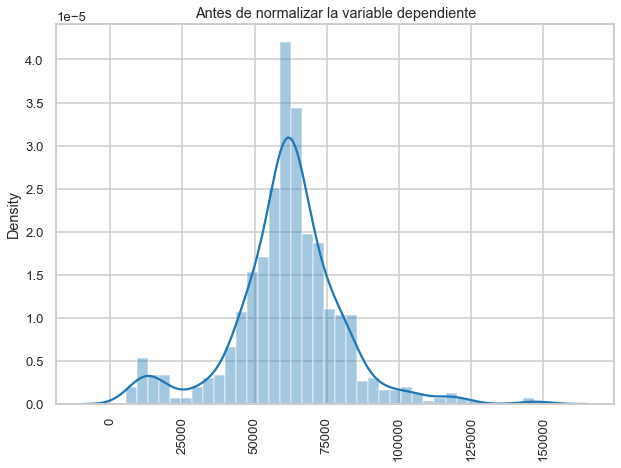

In [57]:
plt.figure(figsize=(10,7))

sns.distplot(y_train);
plt.xticks( rotation=90 );
plt.title("Antes de normalizar la variable dependiente");


### 2.5. Vamos a normalizar la variable dependiente

C:\Users\alber\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



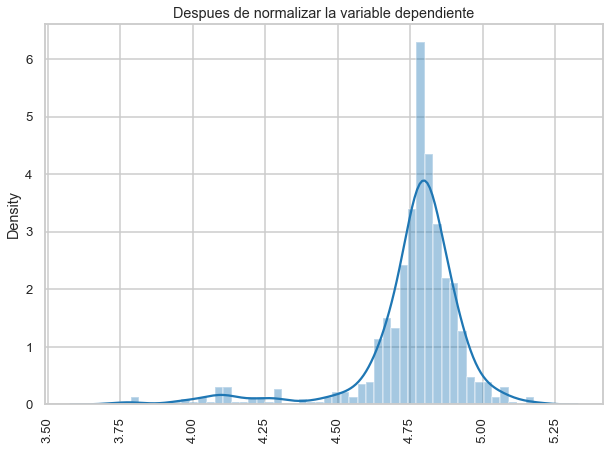

In [58]:
y_train_n = np.log10(y_train)

plt.figure(figsize=(10,7))
sns.distplot(y_train_n);
plt.xticks(rotation=90);
plt.title("Despues de normalizar la variable dependiente");


### 2.6. Seleccion de Caracteristicas

In [59]:
X_train_df = pd.DataFrame(X_train_ss, columns=dataset.drop(['price_square_meter'], axis=1).columns)

In [60]:
X_train_df.head()

lat       lon  days_on_site  amenities  bathrooms  parking_lots  \
0 -0.192809  0.075334      0.646186   -0.07049   0.022617     -0.672957   
1 -0.193793  0.099017     -0.834854   -0.07049   0.022617      1.404201   
2 -0.200230  0.097803     -0.603709   -0.07049   0.022617     -0.672957   
3 -0.200501  0.095122     -0.595148   -0.07049   0.022617      1.404201   
4  4.670021 -1.582694      0.132530   -0.07049  -1.020424     -0.672957   

   num_bedrooms        m2  final_price  educativo_total  \
0     -0.163860 -0.400910    -0.484174        -2.411866   
1     -0.163860 -0.400910    -0.719616         1.595591   
2     -0.163860 -0.289876    -1.691499         0.131328   
3     -0.163860 -0.134429    -0.045390        -0.562271   
4     -1.730519 -1.022701    -0.886107        -2.103601   

   educativo_suma_per_ocu  financiero_total  financiero_suma_per_ocu  \
0               -1.873745         -0.701309                -0.232307   
1                1.613936          0.743384                 0.923987   
2               -0.033024         -0.340136                -0.232307   
3               -0.662745         -0.059223                 0.013713   
4               -2.019065         -0.821700                -0.921163   

   recreativo_total  recreativo_suma_per_ocu  salud_total  salud_suma_per_ocu  \
0         -0.334713                -0.072978    -1.130772           -1.219689   
1          0.897281                 0.800134    -0.839787           -0.764933   
2         -0.437379                -0.278416    -0.146656           -0.152760   
3         -0.129380                 0.132460     0.098556            0.057127   
4         -1.258708                -1.254247    -1.114424           -1.208029   

   inmobiliario_total  inmobiliario_suma_per_ocu  transporte_total  \
0           -1.734063                  -1.181986         -1.395826   
1            0.972376                   0.927294         -1.078044   
2            0.012027                   0.092371         -0.283588   
3            0.186636                   0.092371         -0.283588   
4           -1.646759                  -1.709306         -0.601370   

   transporte_suma_per_ocu  profesional_total  profesional_suma_per_ocu  \
0                -0.956732          -1.710536                 -1.177176   
1                -0.680430           0.383453                  0.766716   
2                -0.404128          -0.140044                 -0.389776   
3                -0.265976           0.121704                 -0.127310   
4                -0.542279          -2.408532                 -2.309062   

   basico_total  basico_suma_per_ocu  comercio_total  comercio_suma_per_ocu  \
0     -0.948683             0.452682       -1.570224              -1.415034   
1           NaN                  NaN       -0.335995              -0.133580   
2           NaN                  NaN        0.134188               0.058638   
3           NaN                  NaN        0.192961               0.379001   
4           NaN                  NaN       -2.040406              -1.991689   

   entidad__BAJA CALIFORNIA  entidad__CIUDAD DE MÉXICO  entidad__NUEVO LEÓN     
0                 -0.035737                   0.202901               -0.199469  
1                 -0.035737                   0.202901               -0.199469  
2                 -0.035737                   0.202901               -0.199469  
3                 -0.035737                   0.202901               -0.199469  
4                 -0.035737                  -4.928521                5.013316

### 2.6.1. Matriz de confusion

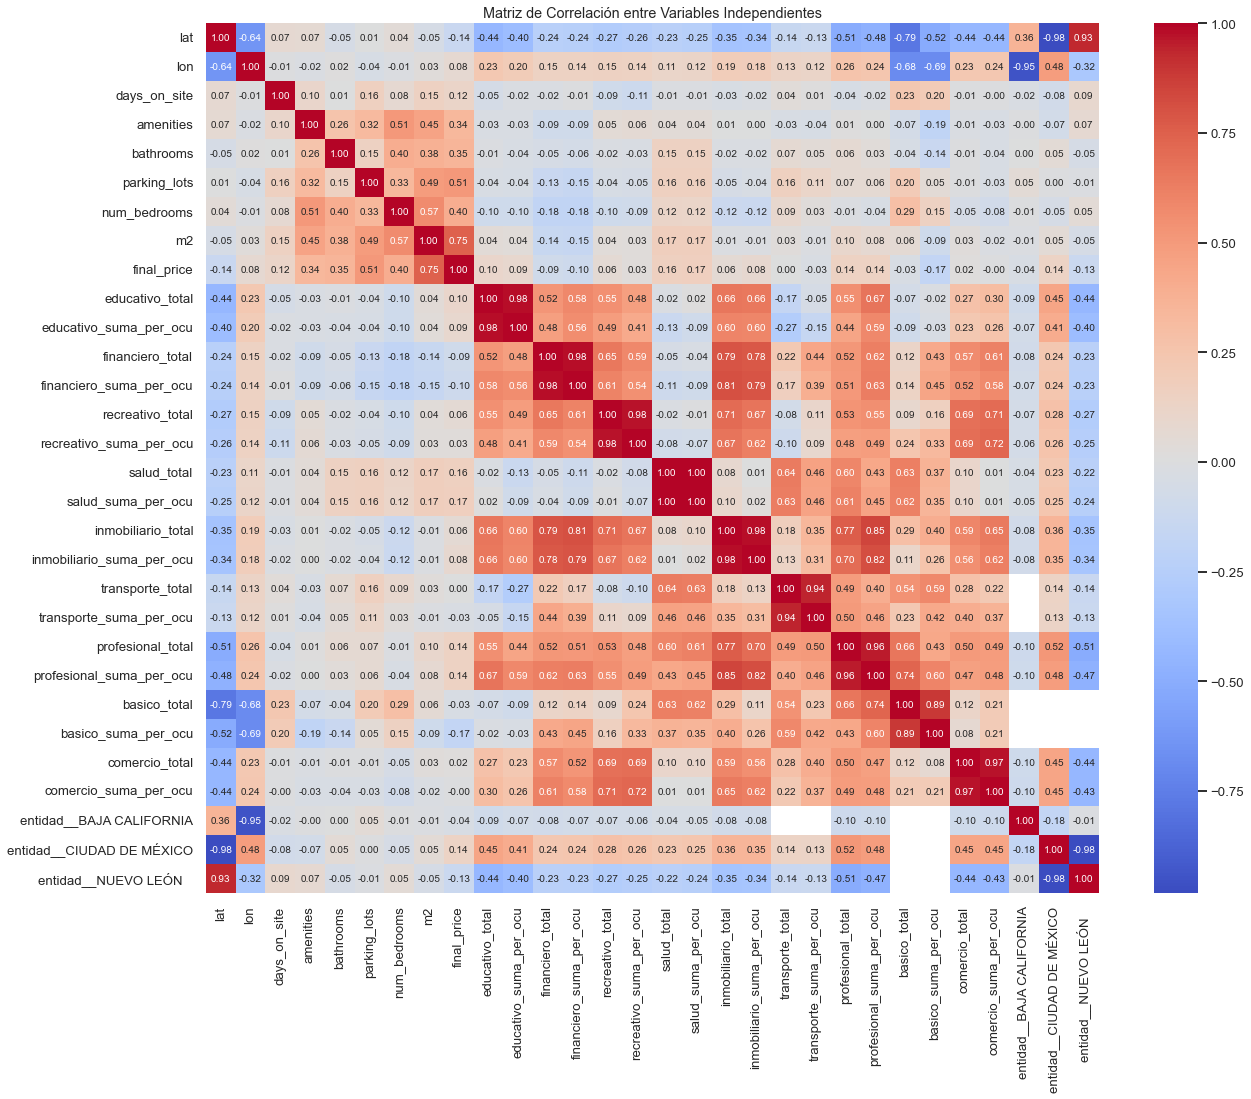

Correlación de Variables Independientes con la Variable Dependiente:


final_price                  0.439595
num_bedrooms                 0.252075
basico_suma_per_ocu          0.192411
basico_total                 0.178978
m2                           0.151389
inmobiliario_suma_per_ocu    0.110730
amenities                    0.105238
profesional_suma_per_ocu     0.104252
parking_lots                 0.089035
days_on_site                 0.081834
lat                          0.080701
inmobiliario_total           0.078881
entidad__CIUDAD DE MÉXICO    0.077320
entidad__NUEVO LEÓN          0.071200
profesional_total            0.069576
lon                          0.060162
educativo_total              0.048130
recreativo_total             0.046755
comercio_total               0.046149
entidad__BAJA CALIFORNIA     0.039487
financiero_total             0.034063
salud_suma_per_ocu           0.032355
educativo_suma_per_ocu       0.030978
salud_total                  0.028158
financiero_suma_per_ocu      0.021409
comercio_suma_per_ocu        0.019717
recreativo_s

In [61]:
# Convertir las listas en DataFrames de pandas
y_train_df = pd.DataFrame(y_train_n, columns=['price_square_meter'])

# Calcular la matriz de correlación
correlation_matrix = X_train_df.corr()

# Calcular la correlación de las variables independientes con la variable dependiente
correlation_with_target = X_train_df.corrwith(y_train_df['price_square_meter']).sort_values(ascending=False)
correlation_with_target_abs = X_train_df.corrwith(y_train_df['price_square_meter']).abs().sort_values(ascending=False)


# Crear un mapa de calor para la matriz de correlación
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlación entre Variables Independientes")
plt.show()

# Mostrar la correlación de las variables con la variable dependiente ordenada
print("Correlación de Variables Independientes con la Variable Dependiente:")
correlation_with_target_abs

In [62]:
correlation_with_target

final_price                  0.439595
inmobiliario_suma_per_ocu    0.110730
profesional_suma_per_ocu     0.104252
parking_lots                 0.089035
inmobiliario_total           0.078881
entidad__CIUDAD DE MÉXICO    0.077320
profesional_total            0.069576
lon                          0.060162
educativo_total              0.048130
recreativo_total             0.046755
financiero_total             0.034063
salud_suma_per_ocu           0.032355
educativo_suma_per_ocu       0.030978
salud_total                  0.028158
financiero_suma_per_ocu      0.021409
recreativo_suma_per_ocu      0.017151
transporte_suma_per_ocu     -0.004432
transporte_total            -0.014741
bathrooms                   -0.014972
comercio_suma_per_ocu       -0.019717
entidad__BAJA CALIFORNIA    -0.039487
comercio_total              -0.046149
entidad__NUEVO LEÓN         -0.071200
lat                         -0.080701
days_on_site                -0.081834
amenities                   -0.105238
m2          

- El final price esta muy correlacionada, esta variable no la podemos utilizar para la prediccion del precio por metro cuadrado. 

### 2.6.2 Tecnicas de seleccion de caracteristicas

In [63]:
X_train_df

lat       lon  days_on_site  amenities  bathrooms  parking_lots  \
0   -0.192809  0.075334      0.646186   -0.07049   0.022617     -0.672957   
1   -0.193793  0.099017     -0.834854   -0.07049   0.022617      1.404201   
2   -0.200230  0.097803     -0.603709   -0.07049   0.022617     -0.672957   
3   -0.200501  0.095122     -0.595148   -0.07049   0.022617      1.404201   
4    4.670021 -1.582694      0.132530   -0.07049  -1.020424     -0.672957   
..        ...       ...           ...        ...        ...           ...   
779 -0.193792  0.099017     -0.381125   -0.07049  -1.020424     -0.672957   
780 -0.202052  0.100147     -0.595148   -0.07049   0.022617     -0.672957   
781 -0.206047  0.099144     -0.381125   -2.23771   0.022617     -0.672957   
782  4.669876 -1.581680      0.132530   -0.07049  -1.020424      1.404201   
783 -0.193792  0.099017     -0.381125   -0.07049  -1.020424     -0.672957   

     num_bedrooms        m2  final_price  educativo_total  \
0       -0.163860 -0.400910    -0.484174        -2.411866   
1       -0.163860 -0.400910    -0.719616         1.595591   
2       -0.163860 -0.289876    -1.691499         0.131328   
3       -0.163860 -0.134429    -0.045390        -0.562271   
4       -1.730519 -1.022701    -0.886107        -2.103601   
..            ...       ...          ...              ...   
779     -0.163860 -0.978287    -0.620394         1.595591   
780     -0.163860 -0.800633    -0.599287        -0.562271   
781     -0.163860 -0.334290    -0.280718        -0.485204   
782     -1.730519 -1.377344    -1.331254        -1.872401   
783     -1.730519 -1.489044    -0.576332         1.595591   

     educativo_suma_per_ocu  financiero_total  financiero_suma_per_ocu  \
0                 -1.873745         -0.701309                -0.232307   
1                  1.613936          0.743384                 0.923987   
2                 -0.033024         -0.340136                -0.232307   
3                 -0.662745         -0.059223                 0.013713   
4                 -2.019065         -0.821700                -0.921163   
..                      ...               ...                      ...   
779                1.613936          0.743384                 0.923987   
780               -0.711185         -1.223004                -1.093377   
781               -0.468985         -1.423656                -1.388600   
782               -1.776865         -0.901961                -0.970367   
783                1.613936          0.743384                 0.923987   

     recreativo_total  recreativo_suma_per_ocu  salud_total  \
0           -0.334713                -0.072978    -1.130772   
1            0.897281                 0.800134    -0.839787   
2           -0.437379                -0.278416    -0.146656   
3           -0.129380                 0.132460     0.098556   
4           -1.258708                -1.254247    -1.114424   
..                ...                      ...          ...   
779          0.897281                 0.800134    -0.839787   
780         -1.361374                -0.946090    -0.754780   
781         -1.053376                -0.740652    -0.480143   
782         -1.361374                -1.305607    -1.107885   
783          0.897281                 0.800134    -0.839787   

     salud_suma_per_ocu  inmobiliario_total  inmobiliario_suma_per_ocu  \
0             -1.219689           -1.734063                  -1.181986   
1             -0.764933            0.972376                   0.927294   
2             -0.152760            0.012027                   0.092371   
3              0.057127            0.186636                   0.092371   
4             -1.208029           -1.646759                  -1.709306   
..                  ...                 ...                        ...   
779           -0.764933            0.972376                   0.927294   
780           -0.741612           -0.861018                  -0.654666   
781           -0.455931           -0.948

In [64]:
X_train_df = X_train_df.drop(['final_price'], axis=1)

In [65]:
# Manejo de valores faltantes

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_df)
X_train_df = pd.DataFrame(X_train_imputed, columns=X_train_df.columns)

In [66]:
# Técnica 1: Selección de características univariada (SelectKBest)

selector_kbest = SelectKBest(score_func=f_regression, k=5)
X_train_kbest = selector_kbest.fit_transform(X_train_df, y_train_n)
selected_features_kbest = X_train_df.columns[selector_kbest.get_support()]
selected_features_kbest

Index(['amenities', 'num_bedrooms', 'm2', 'inmobiliario_suma_per_ocu',
       'profesional_suma_per_ocu'],
      dtype='object')

In [67]:
# Técnica 2: Selección de características univariada (SelectPercentile)
selector_percentile = SelectPercentile(score_func=f_regression, percentile=50)
X_train_percentile = selector_percentile.fit_transform(X_train_df, y_train_n)
selected_features_percentile = X_train_df.columns[selector_percentile.get_support()]

selected_features_percentile

Index(['lat', 'days_on_site', 'amenities', 'parking_lots', 'num_bedrooms',
       'm2', 'inmobiliario_total', 'inmobiliario_suma_per_ocu',
       'profesional_total', 'profesional_suma_per_ocu', 'basico_total',
       'basico_suma_per_ocu', 'entidad__CIUDAD DE MÉXICO',
       'entidad__NUEVO LEÓN   '],
      dtype='object')

In [68]:
# Técnica 3: Selección de características mediante modelo (SelectFromModel) (1)

# Selección de características mediante modelo RandomForest
model_rf = RandomForestRegressor()
model_rf.fit(X_train_df, y_train_n)
sfm_rf = SelectFromModel(model_rf, threshold=0.02)
sfm_rf.fit(X_train_df, y_train_n)
X_sfm_rf = sfm_rf.transform(X_train_df)
selected_features_sfm_rf = X_train_df.columns[sfm_rf.get_support()]

selected_features_sfm_rf

Index(['lat', 'lon', 'days_on_site', 'parking_lots', 'num_bedrooms', 'm2',
       'educativo_total', 'educativo_suma_per_ocu', 'financiero_total',
       'financiero_suma_per_ocu', 'recreativo_suma_per_ocu', 'salud_total',
       'inmobiliario_suma_per_ocu', 'transporte_suma_per_ocu',
       'profesional_total', 'profesional_suma_per_ocu', 'comercio_total',
       'comercio_suma_per_ocu'],
      dtype='object')

In [69]:
# Técnica 3: Selección de características mediante modelo (SelectFromModel) (2)


# Selección de características mediante modelo Lasso
lasso = Lasso(alpha=0.0001, max_iter=1000)
lasso.fit(X_train_df, y_train_n)
sfm_lasso = SelectFromModel(lasso, threshold=0.02)
sfm_lasso.fit(X_train_df, y_train_n)
X_sfm_lasso = sfm_lasso.transform(X_train_df)
selected_features_sfm_lasso = X_train_df.columns[sfm_lasso.get_support()]

selected_features_sfm_lasso

Index(['bathrooms', 'parking_lots', 'num_bedrooms', 'm2', 'educativo_total',
       'educativo_suma_per_ocu', 'financiero_total', 'financiero_suma_per_ocu',
       'recreativo_total', 'recreativo_suma_per_ocu', 'salud_total',
       'transporte_suma_per_ocu', 'profesional_total',
       'profesional_suma_per_ocu', 'basico_total', 'basico_suma_per_ocu',
       'comercio_total', 'comercio_suma_per_ocu', 'entidad__CIUDAD DE MÉXICO'],
      dtype='object')

In [70]:
# Técnica 4: Recursive Feature Elimination (RFE)

estimator = LinearRegression()
rfe = RFE(estimator, n_features_to_select=5)
X_rfe = rfe.fit_transform(X_train_df, y_train_n)
selected_features_rfe = X_train_df.columns[rfe.support_]

selected_features_rfe 

Index(['lat', 'profesional_suma_per_ocu', 'entidad__BAJA CALIFORNIA',
       'entidad__CIUDAD DE MÉXICO', 'entidad__NUEVO LEÓN   '],
      dtype='object')

In [71]:
# Técnica 5: Recursive Feature Elimination (RFE) con Cross-Validation

rfecv = RFECV(estimator=LinearRegression(), step=1, cv=5)
X_rfecv = rfecv.fit_transform(X_train_df, y_train_n)
selected_features_rfecv = X_train_df.columns[rfecv.support_]

selected_features_rfecv

Index(['lat', 'educativo_suma_per_ocu', 'salud_total', 'salud_suma_per_ocu',
       'profesional_total', 'profesional_suma_per_ocu', 'basico_suma_per_ocu',
       'entidad__BAJA CALIFORNIA', 'entidad__CIUDAD DE MÉXICO',
       'entidad__NUEVO LEÓN   '],
      dtype='object')

In [72]:
# Técnica 6: Sequential Feature Selection
sfs = SequentialFeatureSelector(LinearRegression(), n_features_to_select=5)
X_sfs = sfs.fit_transform(X_train_df, y_train_n)
selected_features_sfs = X_train_df.columns[sfs.get_support()]

selected_features_sfs

Index(['lat', 'parking_lots', 'num_bedrooms', 'm2', 'comercio_total'], dtype='object')

In [73]:
# Crear un DataFrame con los métodos como índices y las variables seleccionadas como columnas
methods = ['SelectKBest','SelectPercentile','SelectFromModel (RandomForest)', 'SelectFromModel (Lasso)', 'RFE', 'RFECV', 'Sequential Feature Selection']
selected_features = [selected_features_kbest,selected_features_percentile,selected_features_sfm_rf, selected_features_sfm_lasso, selected_features_rfe, selected_features_rfecv, selected_features_sfs]

data = {}
for method, features in zip(methods, selected_features):
    data[method] = [1 if var in features else 0 for var in dataset.drop(['price_square_meter'], axis=1).columns]

df_summary = pd.DataFrame(data, index=dataset.drop(['price_square_meter'], axis=1).columns)
df_summary['Suma'] = df_summary.sum(axis=1)
df_summary_sorted = df_summary.sort_values(by='Suma', ascending=False)

df_summary_sorted

SelectKBest  SelectPercentile  \
profesional_suma_per_ocu             1                 1   
lat                                  0                 1   
num_bedrooms                         1                 1   
m2                                   1                 1   
entidad__CIUDAD DE MÉXICO            0                 1   
parking_lots                         0                 1   
profesional_total                    0                 1   
inmobiliario_suma_per_ocu            1                 1   
comercio_total                       0                 0   
basico_suma_per_ocu                  0                 1   
salud_total                          0                 0   
entidad__NUEVO LEÓN                  0                 1   
educativo_suma_per_ocu               0                 0   
financiero_suma_per_ocu              0                 0   
days_on_site                         0                 1   
entidad__BAJA CALIFORNIA             0                 0   
comercio_suma_per_ocu                0                 0   
amenities                            1                 1   
basico_total                         0                 1   
educativo_total                      0                 0   
financiero_total                     0                 0   
recreativo_suma_per_ocu              0                 0   
transporte_suma_per_ocu              0                 0   
inmobiliario_total                   0                 1   
bathrooms                            0                 0   
salud_suma_per_ocu                   0                 0   
lon                                  0                 0   
recreativo_total                     0                 0   
transporte_total                     0                 0   
final_price                          0                 0   

                           SelectFromModel (RandomForest)  \
profesional_suma_per_ocu                                1   
lat                                                     1   
num_bedrooms                                            1   
m2                                                      1   
entidad__CIUDAD DE MÉXICO                               0   
parking_lots                                            1   
profesional_total                                       1   
inmobiliario_suma_per_ocu                               1   
comercio_total                                          1   
basico_suma_per_ocu                                     0   
salud_total                                             1   
entidad__NUEVO LEÓN                                     0   
educativo_suma_per_ocu                                  1   
financiero_suma_per_ocu                                 1   
days_on_site                                            1   
entidad__BAJA CALIFORNIA                                0   
comercio_suma_per_ocu                                   1   
amenities                                               0   
basico_total                                            0   
educativo_total                                         1   
financiero_total                                        1   
recreativo_suma_per_ocu                                 1   
transporte_suma_per_ocu                                 1   
inmobiliario_total                                      0   
bathrooms                                               0   
salud_suma_per_ocu                                      0   
lon                                                     1   
recreativo_total                                        0   
transporte_total                                        0   
final_price                                             0   

                           SelectFromModel (Lasso)  RFE  RFECV  \
profesional_suma_per_ocu                         1    1      1   
lat                                              0    1      1   
num_bedrooms                                     1    0      0   
m2        

En el proceso de selección de variables para la predicción de precios por metro cuadrado de viviendas, se evaluaron distintos métodos que tuvieron en cuenta la relevancia de cada atributo en el modelo. Los resultados indican que ciertas variables sobresalen en términos de apariciones en los diferentes métodos:

- La variable "m2", que representa los metros cuadrados de las viviendas, es considerada en todos los métodos, lo cual es esperado ya que es una característica directamente relacionada con el precio.


- Variables como "lat" y "lon", que corresponden a las coordenadas geográficas, así como "educativo_suma_per_ocu" y "salud_total" que agregan información sobre la cercanía de centros educativos y de salud, también aparecen de manera consistente en varios métodos.


- Se destaca la importancia de características relacionadas con servicios cercanos, como "profesional_total", "inmobiliario_suma_per_ocu" y "comercio_total", que son consideradas en múltiples métodos de selección.


Cabe mencionar que la presencia de ciertas variables en varios métodos refuerza su influencia en la predicción de precios por metro cuadrado. No obstante, para obtener un análisis más exhaustivo y preciso, es crucial considerar el contexto y las interacciones entre estas variables. En ese sentido, se recomienda un enfoque más detallado, incluyendo la combinacion de este analisis con la exploracion de correlaciones. 

### 2.6.3. Variables seleccionadas

In [74]:
selected_variables = df_summary_sorted.index[df_summary_sorted['Suma'] >= 2].tolist()
selected_variables

['profesional_suma_per_ocu',
 'lat',
 'num_bedrooms',
 'm2',
 'entidad__CIUDAD DE MÉXICO',
 'parking_lots',
 'profesional_total',
 'inmobiliario_suma_per_ocu',
 'comercio_total',
 'basico_suma_per_ocu',
 'salud_total',
 'entidad__NUEVO LEÓN   ',
 'educativo_suma_per_ocu',
 'financiero_suma_per_ocu',
 'days_on_site',
 'entidad__BAJA CALIFORNIA',
 'comercio_suma_per_ocu',
 'amenities',
 'basico_total',
 'educativo_total',
 'financiero_total',
 'recreativo_suma_per_ocu',
 'transporte_suma_per_ocu']

In [75]:
# Manejo de valores faltantes
imputer = SimpleImputer(strategy='mean')
dataset_imputed = imputer.fit_transform(dataset)
dataset_df = pd.DataFrame(dataset_imputed, columns=dataset.columns)

# 4. Modelamiento

In [76]:
# Data para modelar
dataset_selected = dataset_df[selected_variables] # dataset filtrado por variables seleccionadas

In [77]:
X_df = dataset_selected # variables independientes
y_df = dataset.price_square_meter

In [78]:
X_train ,X_test , y_train ,y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=0)

In [79]:
X_train

profesional_suma_per_ocu        lat  num_bedrooms     m2  \
154                     189.0  19.420787           2.0  85.00   
40                      426.0  19.419526           2.0  85.00   
865                     285.0  19.411271           2.0  90.00   
298                     317.0  19.410923           2.0  97.00   
809                      51.0  25.656862           1.0  57.00   
..                        ...        ...           ...    ...   
835                     426.0  19.419526           2.0  59.00   
192                     222.0  19.408934           2.0  67.00   
629                     281.0  19.403811           2.0  88.00   
559                      50.0  25.656675           1.0  41.03   
684                     426.0  19.419526           1.0  36.00   

     entidad__CIUDAD DE MÉXICO  parking_lots  profesional_total  \
154                        1.0           1.0               68.0   
40                         1.0           2.0              188.0   
865                        1.0           1.0              158.0   
298                        1.0           2.0              173.0   
809                        0.0           1.0               28.0   
..                         ...           ...                ...   
835                        1.0           1.0              188.0   
192                        1.0           1.0              117.0   
629                        1.0           1.0              144.0   
559                        0.0           2.0               27.0   
684                        1.0           1.0              188.0   

     inmobiliario_suma_per_ocu  comercio_total  basico_suma_per_ocu  \
154                       26.0            22.0             7.000000   
40                        74.0            43.0             5.387097   
865                       55.0            51.0             5.387097   
298                       55.0            52.0             5.387097   
809                       14.0            14.0             5.387097   
..                         ...             ...                  ...   
835                       74.0            43.0             5.387097   
192                       38.0            41.0             5.387097   
629                       30.0            30.0             5.387097   
559                       13.0            11.0             5.387097   
684                       74.0            43.0             5.387097   

     salud_total  entidad__NUEVO LEÓN     educativo_suma_per_ocu  \
154         24.0                     0.0                    20.0   
40         113.0                     0.0                   164.0   
865        325.0                     0.0                    96.0   
298        400.0                     0.0                    70.0   
809         29.0                     1.0                    14.0   
..           ...                     ...                     ...   
835        113.0                     0.0                   164.0   
192        139.0                     0.0                    68.0   
629        223.0                     0.0                    78.0   
559         31.0                     1.0                    24.0   
684        113.0                     0.0                   164.0   

     financiero_suma_per_ocu  days_on_site  entidad__BAJA CALIFORNIA  \
154                     72.0         180.0                       0.0   
40                     119.0           7.0                       0.0   
865                     72.0          34.0                       0.0   
298                     82.0          35.0                       0.0   
809                     44.0         120.0                       0.0   
..                       ...           ...                       ...   
835                    119.0          60.0                       0.0   
192                     37.0          35.0                       0.0   
629                     25.0          60.0                       0.0   
559                     42.0 

In [80]:
X_test_c=X_test.columns

In [81]:
# Escalado y normalizacion

In [82]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

y_train = np.log10(y_train)
y_test = np.log10(y_test)

## 4.1. Regresión Lineal

In [83]:
regressor = LinearRegression()

In [84]:
regressor = LinearRegression()

regressor.fit(X_train,y_train)

y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

print('Train mse:', metrics.mean_squared_error(y_train, y_train_pred))
print('Test mse:', metrics.mean_squared_error(y_test, y_test_pred))
print('\nTrain mae:', metrics.mean_absolute_error(y_train, y_train_pred))
print('Test mae:', metrics.mean_absolute_error(y_test, y_test_pred))
print('\nTrain R2:', regressor.score(X_train, y_train))
print('Test R2:', regressor.score(X_test, y_test))

Train mse: 0.028490892945022633
Test mse: 0.03172452444313839

Train mae: 0.10510105784594354
Test mae: 0.10940746627934476

Train R2: 0.21426616238777496
Test R2: 0.1749915127839735


## 4.2. RandomForest

In [85]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)


print('Train mse:', metrics.mean_squared_error(y_train, y_train_pred))
print('Test mse:', metrics.mean_squared_error(y_test, y_test_pred))
print('\nTrain mae:', metrics.mean_absolute_error(y_train, y_train_pred))
print('Test mae:', metrics.mean_absolute_error(y_test, y_test_pred))
print('\nTrain R2:', rf_model.score(X_train, y_train))
print('Test R2:', rf_model.score(X_test, y_test))

Train mse: 0.0023817682938639547
Test mse: 0.02014081031522533

Train mae: 0.027744073393470934
Test mae: 0.06874252819833762

Train R2: 0.9343145914923742
Test R2: 0.4762304639348851


## 4.3 XGBoost

In [86]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

print('Train mse:', metrics.mean_squared_error(y_train, y_train_pred))
print('Test mse:', metrics.mean_squared_error(y_test, y_test_pred))
print('\nTrain mae:', metrics.mean_absolute_error(y_train, y_train_pred))
print('Test mae:', metrics.mean_absolute_error(y_test, y_test_pred))
print('\nTrain R2:', xgb_model.score(X_train, y_train))
print('Test R2:', xgb_model.score(X_test, y_test))

Train mse: 0.0003054982353868597
Test mse: 0.021097942009684102

Train mae: 0.00873380109016816
Test mae: 0.075269895329955

Train R2: 0.9915748410786045
Test R2: 0.4513398852682998


### 4.3.1 XGBoost with GridSearch

In [87]:
from sklearn.model_selection import GridSearchCV

params = {'learning_rate': [0.01, 0.03, 0.06],
          'max_depth' : [8,9,10],
          'n_estimators' : [250,280,300]
          }

In [88]:
xgr_optimized = xgb.XGBRegressor(objective="reg:squarederror")
grid = GridSearchCV(estimator=xgr_optimized, scoring="neg_mean_absolute_error", param_grid = params, verbose=1, cv=3)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estim

In [89]:
print(grid.best_params_)

{'learning_rate': 0.06, 'max_depth': 9, 'n_estimators': 250}


In [90]:
xgr_best = xgb.XGBRegressor(learning_rate = 0.06, max_depth  = 8, n_estimators =  250)

In [91]:
xgr_best.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.06, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=250, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [92]:
train_pred = xgr_best.predict(X_train)
test_pred = xgr_best.predict(X_test)

print('Train mse:', metrics.mean_squared_error(y_train, y_train_pred))
print('Test mse:', metrics.mean_squared_error(y_test, y_test_pred))
print('\nTrain mae:', metrics.mean_absolute_error(y_train, y_train_pred))
print('Test mae:', metrics.mean_absolute_error(y_test, y_test_pred))

print('\nTrain R2:', xgr_best.score(X_train, y_train))
print('Test R2:', xgr_best.score(X_test, y_test))

Train mse: 0.0003054982353868597
Test mse: 0.021097942009684102

Train mae: 0.00873380109016816
Test mae: 0.075269895329955

Train R2: 0.9885176197206743
Test R2: 0.4628401730439541


## 4.4. Eleccion del modelo

Análisis de Resultados:

- La Regresión Lineal presenta un desempeño limitado con coeficientes de determinación (R2) bajos, indicando que no captura bien la relación no lineal entre variables.


- El modelo Random Forest muestra un mejor rendimiento con R2 cercano a 0.5 en el conjunto de prueba, indicando que puede capturar patrones no lineales.


- XGBoost tiene el mejor rendimiento en términos de R2 en el conjunto de entrenamiento (0.9913) pero su rendimiento en el conjunto de prueba es relativamente inferior.

- La versión optimizada de XGBoost con Grid Search no mejora significativamente los resultados.

Elección del Mejor Modelo:

Basándonos en las métricas de rendimiento, el modelo Random Forest parece ser el mejor candidato. Tiene un buen equilibrio entre el rendimiento en los conjuntos de entrenamiento y prueba, y su R2 en el conjunto de prueba sugiere una capacidad decente para generalizar patrones no lineales en datos nuevos.


Recomendaciones:

- La cantidad de registros en el conjunto de datos es un factor a considerar, ya que un mayor número de observaciones permite a los modelos capturar patrones más complejos y variabilidad en los datos. Por lo tanto, se recomienda la recopilación continua de datos de propiedades con sus respectivos precios por metro cuadrado. Esto no solo aumentará la cantidad total de registros, sino que también diversificará la gama de propiedades representadas en el conjunto de datos, lo que puede llevar a modelos más generalizables y precisos.

- Además de aumentar la cantidad de datos, también se debe prestar atención a la calidad de la información. Esto implica la inclusión de mas variables explicativas relevantes que puedan influir en los precios de las viviendas. La ingeniería de características, como la adición de indicadores de ubicación, características arquitectónicas detalladas y datos socioeconómicos, podría proporcionar una comprensión más rica de los factores que afectan los precios.


# 5. Explicabilidad del modelo

## 5.1.  Importancia de las variables

In [93]:
data1 = {'Variables':  X_test_c,
        'Importancia': rf_model.feature_importances_
        }

df = pd.DataFrame (data1, columns = ['Variables','Importancia'])

#ORDENO DATA
df.sort_values(by=['Importancia'], ascending=False).reset_index(drop=True)

Variables  Importancia
0                          m2     0.184923
1                         lat     0.099157
2      educativo_suma_per_ocu     0.085936
3           profesional_total     0.067368
4                days_on_site     0.054183
5                 salud_total     0.050483
6     recreativo_suma_per_ocu     0.048204
7    profesional_suma_per_ocu     0.045426
8     transporte_suma_per_ocu     0.045149
9              comercio_total     0.044901
10           financiero_total     0.042315
11      comercio_suma_per_ocu     0.041058
12  inmobiliario_suma_per_ocu     0.040919
13    financiero_suma_per_ocu     0.034863
14            educativo_total     0.033130
15               num_bedrooms     0.029694
16               parking_lots     0.018948
17                  amenities     0.013362
18        basico_suma_per_ocu     0.011126
19               basico_total     0.008048
20  entidad__CIUDAD DE MÉXICO     0.000551
21     entidad__NUEVO LEÓN        0.000228
22   entidad__BAJA CALIFORNIA     0.000027

- Según los resultados obtenidos, el modelo para predecir el precio por metro cuadrado de las viviendas ha identificado varias variables importantes. La variable más importante es m2, con una importancia de 0.184923, lo que indica que el tamaño de la vivienda es un factor clave en la predicción del precio por metro cuadrado.

- Otras variables importantes incluyen educativo_suma_per_ocu, profesional_total, salud_total, transporte_suma_per_ocu y recreativo_suma_per_ocu, todas con una importancia superior a 0.04. Estas variables están relacionadas con la cantidad y calidad de los servicios educativos, de transporte, recreativos y de salud en las áreas circundantes a las viviendas.

- También es interesante notar que la variable num_bedrooms tiene una importancia de 0.029694, lo que indica que el número de habitaciones en una vivienda también puede influir en su precio por metro cuadrado.

En general, estos resultados sugieren que el precio por metro cuadrado de una vivienda está influenciado por una combinación de factores, incluyendo su tamaño, el número de habitaciones y la cantidad y calidad de los servicios en las áreas circundantes.

## 5.2. Shap Values

In [94]:
explainer = shap.Explainer(rf_model)

In [95]:
shap_values = explainer(X_test)

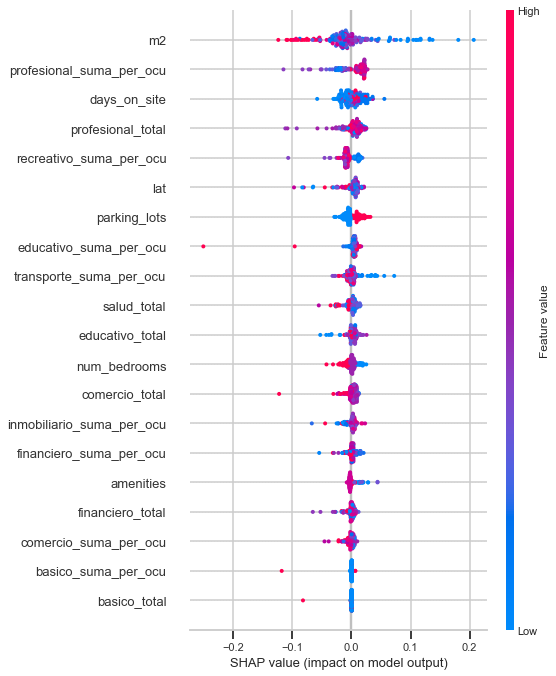

In [96]:
shap.summary_plot(shap_values, X_test,feature_names=X_test_c)

- Analizando el gráfico SHAP, se observa que ciertas variables muestran tendencias claras y significativas en relación con el precio por metro cuadrado de las viviendas. Uno de los ejemplos más notorios es la variable "parking_lots" (puestos de estacionamiento), donde se puede apreciar una marcada separación entre los puntos rojos y azules. Este patrón sugiere que a medida que el número de puestos de estacionamiento aumenta, el precio por metro cuadrado tiende a elevarse, sin solapamiento entre los valores de alta y baja influencia.


- Por otro lado, considerando la variable "m2", la cual presenta una correlación negativa de -0.15 en la matriz de correlación, el análisis se refuerza al observar su SHAP value. La tendencia señala que un incremento en el tamaño de la vivienda (metros cuadrados) está asociado con una disminución en el precio por metro cuadrado. Esta observación es coherente con la intuición de que, en general, viviendas más grandes tienden a tener precios por metro cuadrado más bajos.


- Es interesante notar que el precio por metro cuadrado también es influenciado por la ubicación y la presencia de servicios cercanos. En particular, la cantidad de centros profesionales y empleados ocupados en esos centros parece tener un impacto. A medida que esta cifra aumenta, el precio por metro cuadrado de las viviendas también tiende a elevarse. Esta relación sugiere que la proximidad a centros profesionales y lugares de trabajo influye en la valoración de las propiedades.


- En resumen, el análisis del gráfico SHAP proporciona información valiosa sobre cómo diversas variables afectan el precio por metro cuadrado de las viviendas. Variables como el número de puestos de estacionamiento, el tamaño de la vivienda, la ubicación y la presencia de servicios cercanos desempeñan roles significativos en la determinación de los precios. Estas observaciones destacan la importancia de considerar múltiples factores al analizar y predecir los precios de las viviendas por metro cuadrado.

# Conclusiones

En este análisis exhaustivo de los precios de viviendas por metro cuadrado, hemos explorado diversas dimensiones de datos y aplicado técnicas avanzadas para comprender los factores clave que influyen en los valores inmobiliarios. A través del uso de herramientas como Jupyter Notebook, Python y bibliotecas como scikit-learn, XGBoost, matplotlib y plotly, hemos logrado obtener insights valiosos que pueden ser de gran utilidad para inversionistas y compradores interesados en propiedades.

Nuestro análisis ha destacado la importancia de factores como el tamaño de la vivienda, la ubicación geográfica y la presencia de servicios cercanos en la determinación de los precios por metro cuadrado. Observamos que el tamaño de la vivienda tiene una influencia significativa, donde propiedades más grandes tienden a tener precios por metro cuadrado más bajos. Además, la cercanía a centros educativos, de salud, profesionales y de entretenimiento también juega un papel crucial en la valoración de las propiedades.

A través de la selección de variables y la construcción de modelos tanto de regresión como de árboles, identificamos que el modelo Random Forest y Xgboost mostraron mejores rendimientos en la predicción de precios por metros cuadrados dado a su naturaleza algorítmica compleja que permite una estimación más optima sobre un problema que no tiene una tendencia lineal. No obstante, es importante destacar que los resultados podrían mejorar aún más con un aumento en la cantidad de registros en el conjunto de datos y una mayor inclusión de variables explicativas relevantes. La ingeniería de características y la recopilación continua de datos podrían enriquecer aún más la capacidad predictiva de los modelos.

En última instancia, este análisis subraya la necesidad de considerar múltiples factores al evaluar los precios de las viviendas por metro cuadrado. A medida que el mercado inmobiliario sigue evolucionando, la comprensión detallada de las relaciones entre las características de las propiedades y sus valores resulta fundamental para tomar decisiones informadas y estratégicas.